# **Author - Kislay Karan**

**DATA SCIENCE AND BUSINESS ANALYTICS INTERN**

**GRIP @ The Sparks Foundation**


# **TSF-Task 6_Prediction_using_Decision_Tree_Algorithm ( Level: Intermediate )**

Date : 21-12-2022

Datasets used: https://bit.ly/3kXTdox

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

plt.rcParams['figure.figsize']=[15,12]

# **Importing Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Iris.csv", index_col = 0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print(df.shape)
print("\n No of Unique Species\n",df.Species.unique(),"\n")
df.columns

(150, 5)

 No of Unique Species
 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] 



Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# **EDA**

Visualizing Dataframe






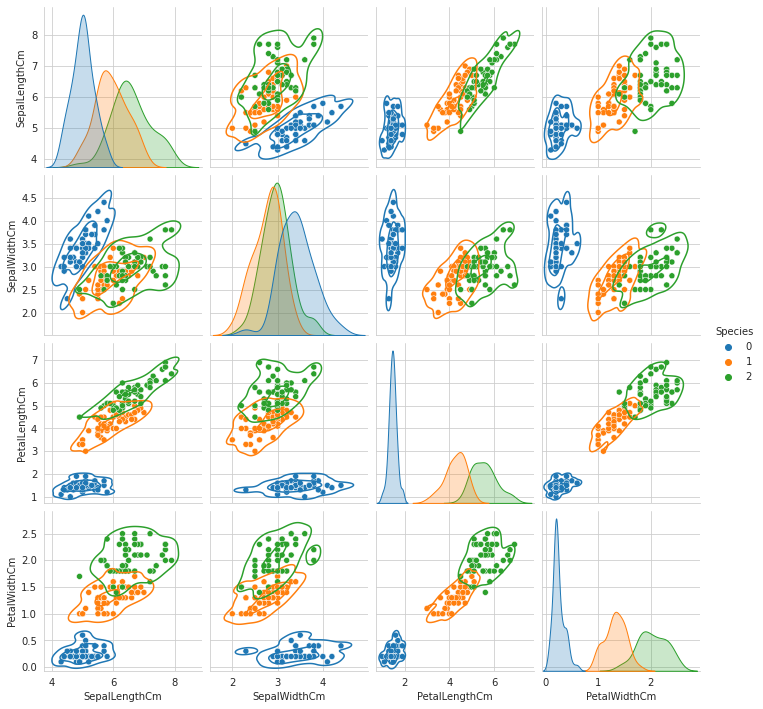

In [ ]:
print("Visualizing Dataframe\n")
sns.set_style("whitegrid")
plot_var_1 = sns.pairplot(df, kind = 'scatter', diag_kind='kde', hue = 'Species', palette=["C0", "C1", "C2"])
plot_var_2 = plot_var_1.map_lower(sns.kdeplot, levels=3)
plot_1 = plot_var_2.map_upper(sns.kdeplot, levels=3)
print(plot_1)
print("\n"*2)


*   **Iris-setosa has the smallest of petals width and lendth. It also has the smallest sepal length but larger sepal widths.**




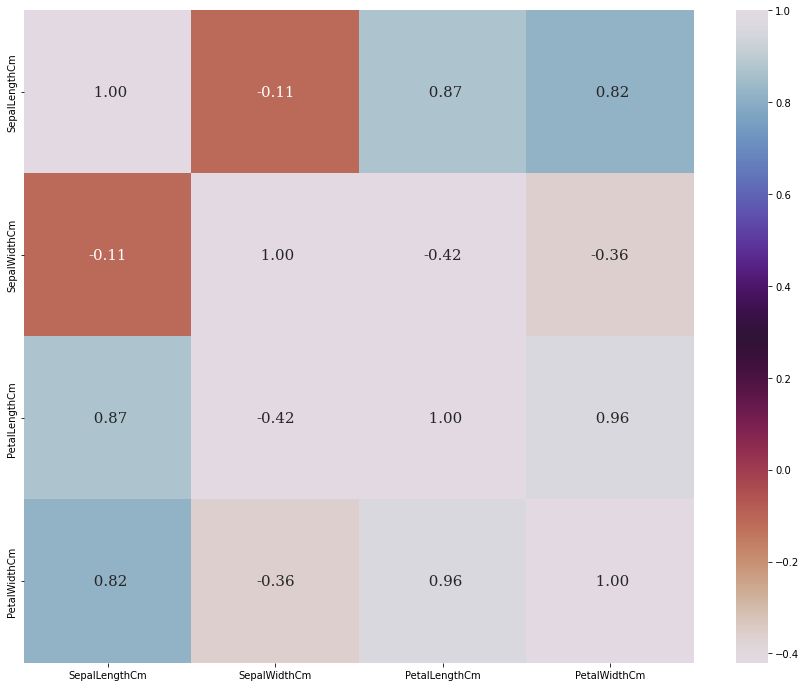

In [ ]:
df.corr()
sns.heatmap(df.corr(),annot_kws={"fontsize":15,"fontfamily":"serif"},fmt=" .2f" , cmap = "twilight_r", annot=True)




*   **Petal width and petal length features are highly correlated with each other.**
*   **Sepal width and sepal length features are slightly correlated with each other.**



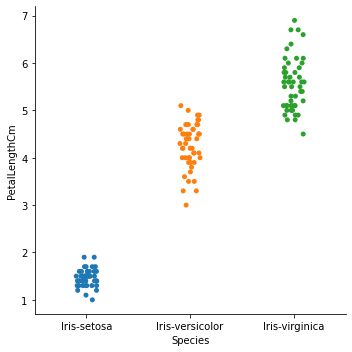

In [ ]:
sns.catplot(x ='Species',y ='PetalLengthCm', data = df)

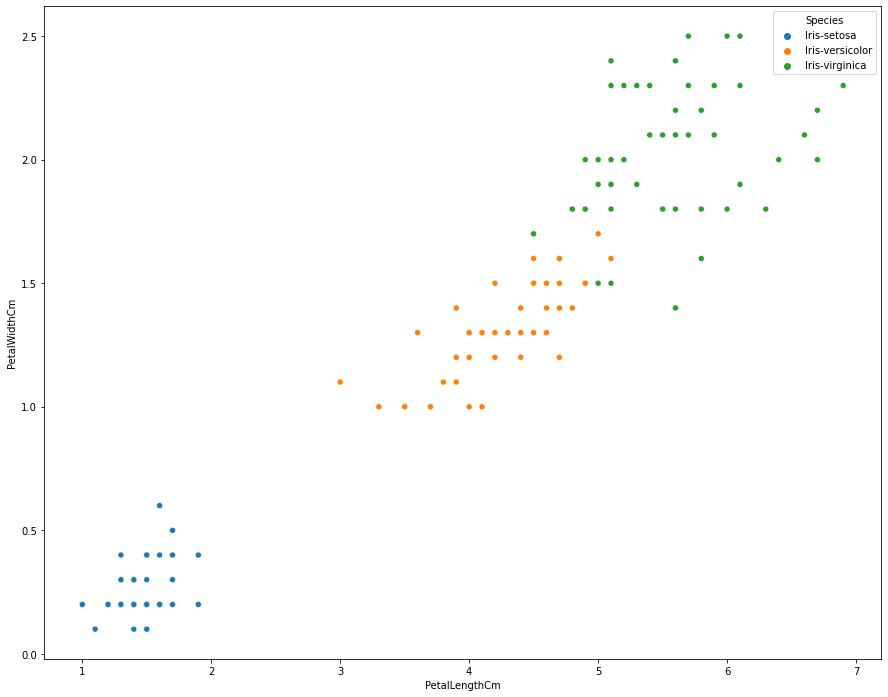

In [ ]:
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",hue="Species",data=df)
plt.show()

.



*   **Iris-setosa has the smaller petal length as well as petal width.**

*   **Iris-versicolor has average petal length and petal width.**
*   **Iris-virginica has the highest petal length as well as petal width.**





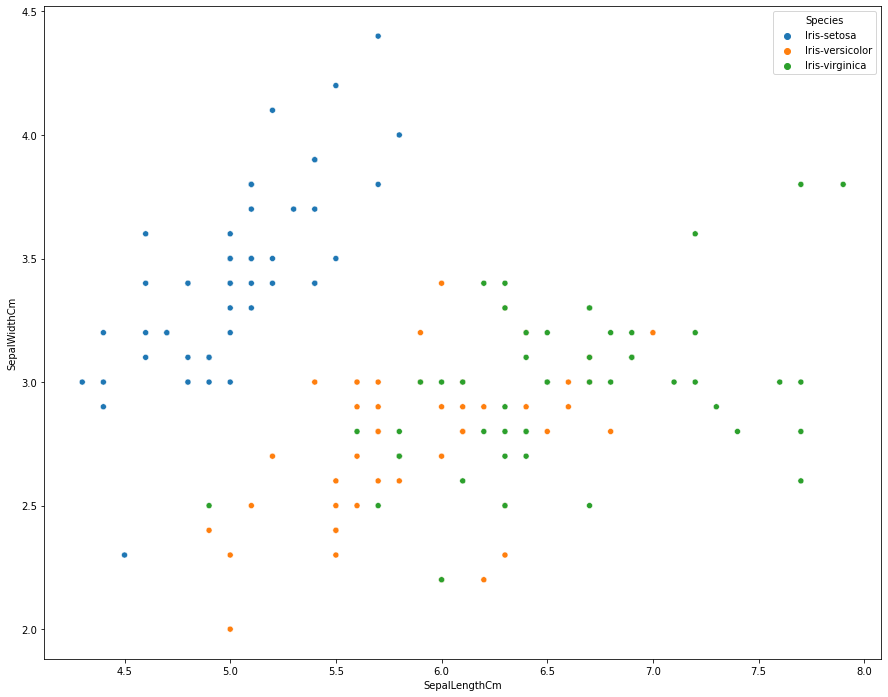

In [ ]:
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",hue="Species",data=df)
plt.show()





*   **Iris-setosa has smaller sepal length but higher width.**

*   **Iris-virginica has larger sepal length and smaller sepal width.**
*   **Iris-versicolor lies in almost middle for sepal length as well as sepal width.**






/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

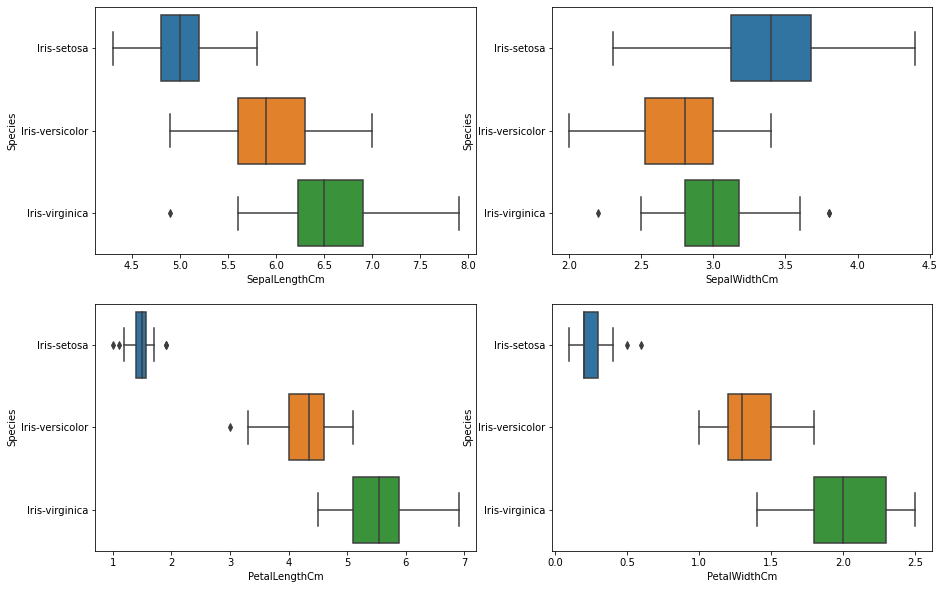

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
sns.boxplot('SepalLengthCm','Species',data = df,ax=axes[0,0])
sns.boxplot('SepalWidthCm','Species',data = df,ax=axes[0,1])
sns.boxplot('PetalLengthCm','Species',data = df,ax=axes[1,0])
sns.boxplot('PetalWidthCm','Species',data = df,ax=axes[1,1])
plt.show()



*   **Iris-setosa has the smaller feature and less distributed with some outliers.**

*   **Iris-versicolor is distributed and has the average feature.**
*   **Iris-viginica has largest feature and highly distributed.**




In [ ]:
mapping = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
df.Species = [mapping[i] for i in df.Species]
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

# **Spliting the Data**

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 365, stratify = y)

In [ ]:
print(np.unique(y_train,return_counts = True))
print(np.unique(y_test,return_counts = True))

(array([0, 1, 2]), array([40, 40, 40]))
(array([0, 1, 2]), array([10, 10, 10]))


# **Feature Scaling : Standardization**

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
     

# **Creating the Decison Tree Model**

In [ ]:
# defining the model parameters
dt=DecisionTreeClassifier(max_depth=10,random_state=2)
# fitting the model on our train data
dt.fit(X_train,y_train)
print("model fitted...")

model fitted...


# **Making a prediction on our Test Data**

In [ ]:
y_pred=dt.predict(X_test)
prediction=dt.score(X_test,y_test)
print('here our model predict the correct target with the accuracy of',100*prediction)

here our model predict the correct target with the accuracy of 93.33333333333333


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# **Hyperparameter Tuning using GridSearch**

In [ ]:
classifier = DecisionTreeClassifier()
grid = GridSearchCV(estimator = classifier, param_grid = {'ccp_alpha':[0.0001,0.001,0.01,0.1,1]},
                    scoring = 'precision', n_jobs = -1)
grid.fit(X_train,y_train)
grid.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


{'ccp_alpha': 0.0001}

# **Final Decision Tree Model**

In [ ]:
classifier = DecisionTreeClassifier(ccp_alpha = 0.0001)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0001)

# **Plotting Decision Tree**

In [ ]:
## text representation
from sklearn import tree
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_3 <= -0.52
|   |--- class: 0
|--- feature_3 >  -0.52
|   |--- feature_3 <= 0.73
|   |   |--- feature_2 <= 0.74
|   |   |   |--- feature_3 <= 0.60
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.60
|   |   |   |   |--- feature_2 <= 0.57
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_2 >  0.57
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.74
|   |   |   |--- feature_0 <= 0.24
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.24
|   |   |   |   |--- class: 2
|   |--- feature_3 >  0.73
|   |   |--- class: 2



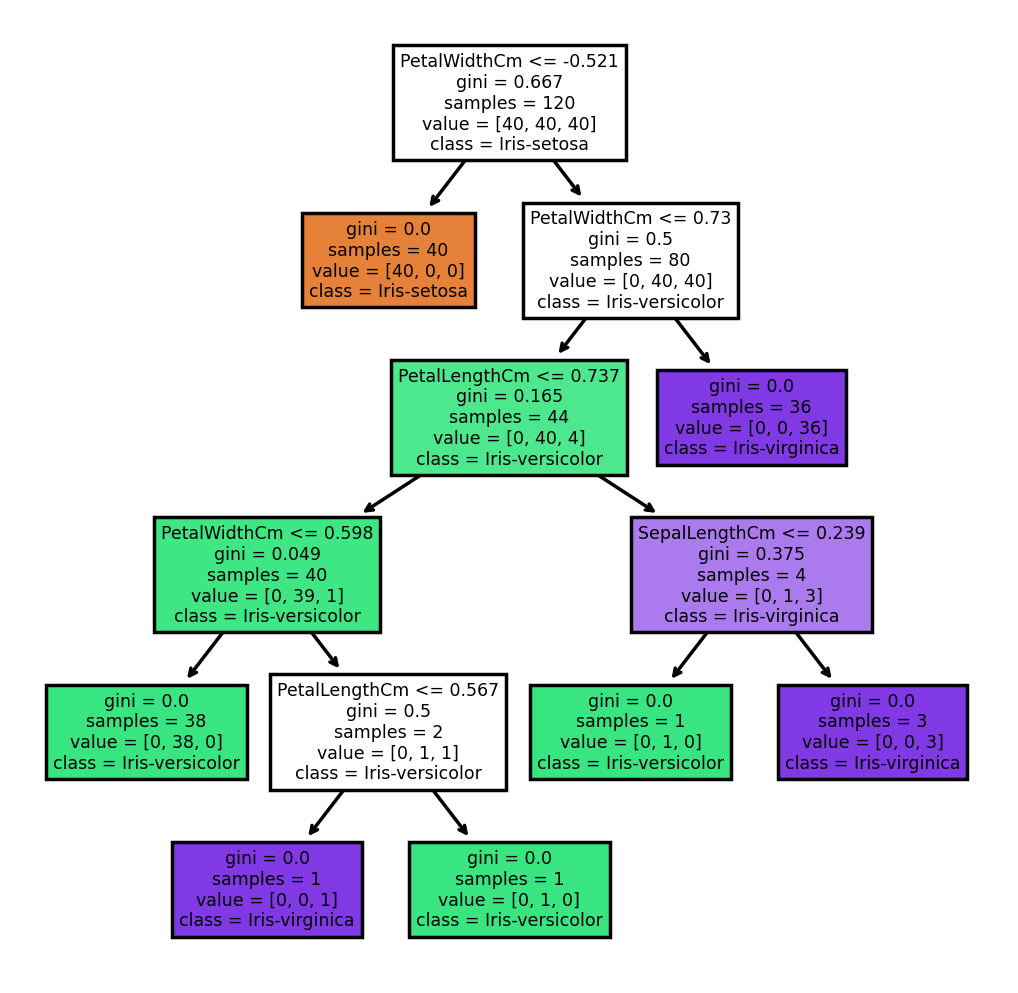

In [ ]:
fn = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn = ['Iris-setosa','Iris-versicolor','Iris-virginica']

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=250,facecolor='white')
_ = tree.plot_tree(dt, feature_names=fn,  class_names=cn,filled=True)

# **Evaluating the Model**

In [ ]:
y_pred = classifier.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')


Accuracy Score: 0.9333333333333333


# **Analysing the Model prediction using Confusion Matrix**

[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


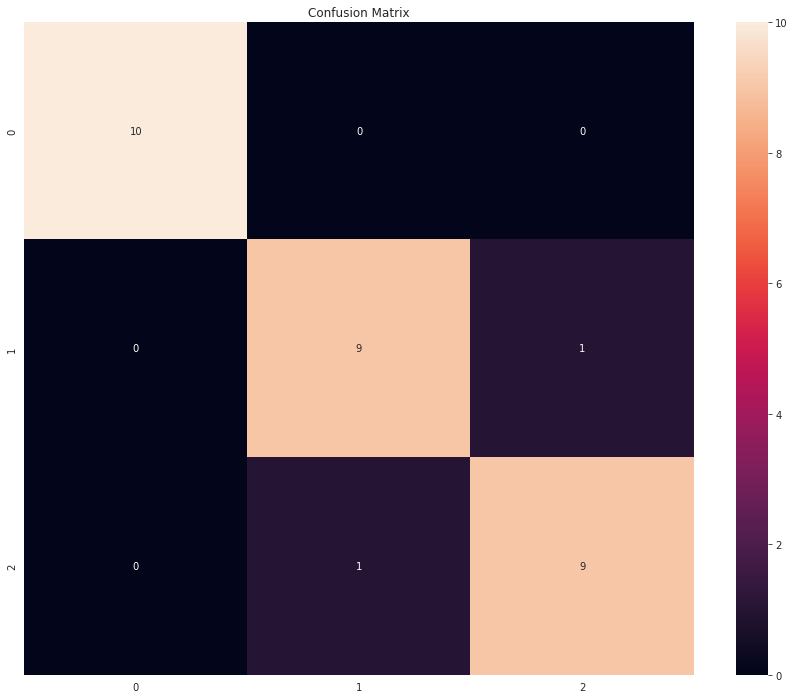

In [ ]:
print(confusion_matrix(y_test,y_pred))
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, xticklabels = np.unique(y_test), yticklabels = np.unique(y_test))
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

